In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [3]:
df=pd.read_csv("C:/Somduity/Python/vehicle1.csv")

In [4]:
df.head()
df.shape

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

(846, 19)

In [5]:
df.groupby("class").agg("count")

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [6]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


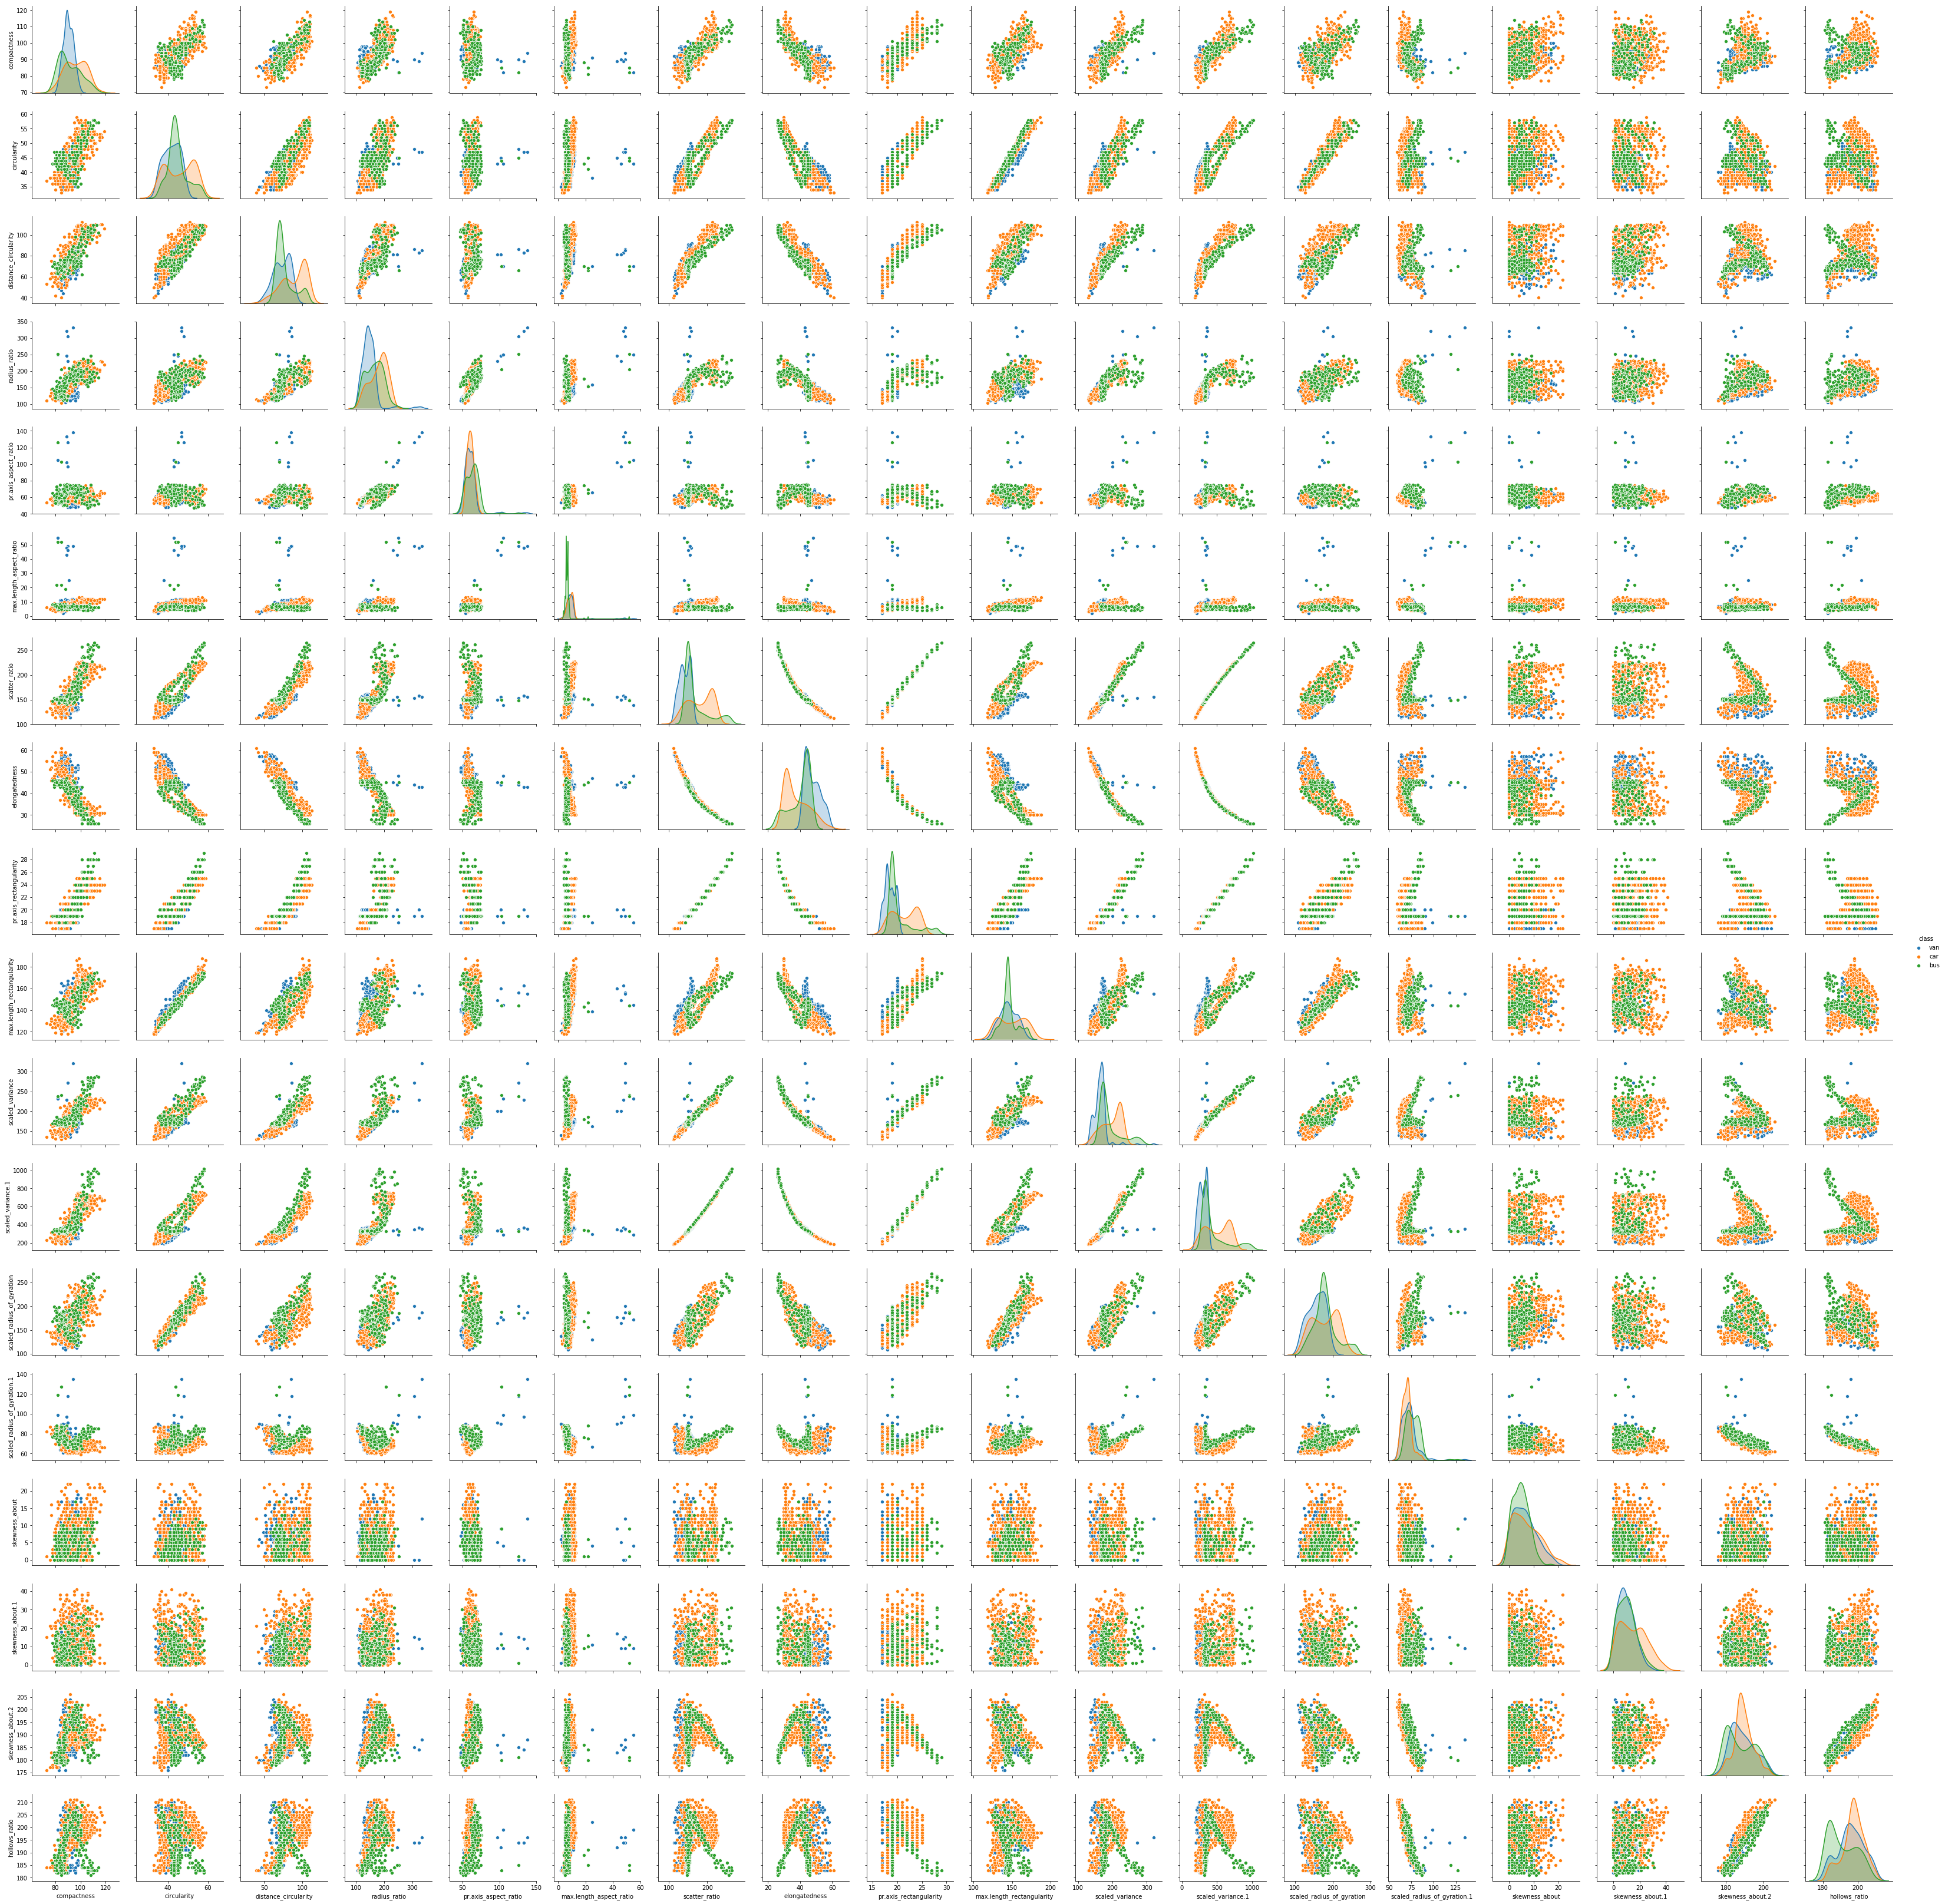

In [7]:
sns.pairplot(df, diag_kind="kde", hue="class")

In [8]:
df.isnull().sum(axis=0)

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [10]:
df1=df.loc[:,{'pr.axis_rectangularity','max.length_aspect_ratio','scaled_variance','scaled_radius_of_gyration'}]
df3=df.drop(columns={'pr.axis_rectangularity','max.length_aspect_ratio','scaled_variance','scaled_radius_of_gyration'},axis=1)
def replace(column):
    median,std=column.median(), column.std()
    #outliers=column>column.quantile(0.95)
    outliers=(column-median).abs()>2*std
    column[outliers]=column.median()
    return column

df2=df1.apply(lambda column : column.transform(replace))
df2.describe().T

df_corrected=df2.join(df3)
df_corrected.head()

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


count        mean        std    min    25%     50%  \
scaled_radius_of_gyration  844.0  172.102488  29.336179  109.0  149.0  173.25   
max.length_aspect_ratio    846.0    8.111111   2.074801    2.0    7.0    8.00   
scaled_variance            843.0  185.378410  27.068539  130.0  167.0  179.00   
pr.axis_rectangularity     843.0   20.380783   2.337032   17.0   19.0   20.00   

                             75%    max  
scaled_radius_of_gyration  192.0  238.0  
max.length_aspect_ratio     10.0   13.0  
scaled_variance            212.0  241.0  
pr.axis_rectangularity      22.0   25.0

scaled_radius_of_gyration  max.length_aspect_ratio  scaled_variance  \
0                      184.0                       10            176.0   
1                      158.0                        9            170.0   
2                      220.0                       10            223.0   
3                      127.0                        9            160.0   
4                      188.0                        8            241.0   

   pr.axis_rectangularity  compactness  circularity  distance_circularity  \
0                    20.0           95         48.0                  83.0   
1                    19.0           91         41.0                  84.0   
2                    23.0          104         50.0                 106.0   
3                    19.0           93         41.0                  82.0   
4                    19.0           85         44.0                  70.0   

   radius_ratio  pr.axis_aspect_ratio  scatter_ratio  elongatedness  \
0         178.0                  72.0          162.0           42.0   
1         141.0                  57.0          149.0           45.0   
2         209.0                  66.0          207.0           32.0   
3         159.0                  63.0          144.0           46.0   
4         205.0                 103.0          149.0           45.0   

   max.length_rectangularity  scaled_variance.1  scaled_radius_of_gyration.1  \
0                        159              379.0                         70.0   
1                        143              330.0                         72.0   
2                        158              635.0                         73.0   
3                        143              309.0                         63.0   
4                        144              325.0                        127.0   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio class  
0             6.0              16.0             187.0            197   van  
1             9.0              14.0             189.0            199   van  
2            14.0               9.0             188.0            196   car  
3             6.0              10.0             199.0            207   van  
4             9.0              11.0             180.0            183   bus

In [11]:
df_corrected.isnull().sum()

scaled_radius_of_gyration      2
max.length_aspect_ratio        0
scaled_variance                3
pr.axis_rectangularity         3
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
scatter_ratio                  1
elongatedness                  1
max.length_rectangularity      0
scaled_variance.1              2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [12]:
df_features=df_corrected.drop(columns='class',axis=1)
from sklearn.preprocessing import Imputer
values=df_features.values 
im=Imputer(missing_values='NaN', strategy='median')
transformed_values=im.fit_transform(values)
df_final=pd.DataFrame(transformed_values,columns=df_features.columns)
df_final2=df_final.join(df_corrected["class"])
df_final2.isnull().sum()


scaled_radius_of_gyration      0
max.length_aspect_ratio        0
scaled_variance                0
pr.axis_rectangularity         0
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
scatter_ratio                  0
elongatedness                  0
max.length_rectangularity      0
scaled_variance.1              0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
classes=np.unique(df_corrected["class"])
classes

array(['bus', 'car', 'van'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()
l=gle.fit_transform(df_final2["class"])
gl_map={index : label for index, label in enumerate(gle.classes_)}
gl_map
df_final2["class_label"]=l
df_final2.head()

{0: 'bus', 1: 'car', 2: 'van'}

scaled_radius_of_gyration  max.length_aspect_ratio  scaled_variance  \
0                      184.0                     10.0            176.0   
1                      158.0                      9.0            170.0   
2                      220.0                     10.0            223.0   
3                      127.0                      9.0            160.0   
4                      188.0                      8.0            241.0   

   pr.axis_rectangularity  compactness  circularity  distance_circularity  \
0                    20.0         95.0         48.0                  83.0   
1                    19.0         91.0         41.0                  84.0   
2                    23.0        104.0         50.0                 106.0   
3                    19.0         93.0         41.0                  82.0   
4                    19.0         85.0         44.0                  70.0   

   radius_ratio  pr.axis_aspect_ratio  scatter_ratio  elongatedness  \
0         178.0                  72.0          162.0           42.0   
1         141.0                  57.0          149.0           45.0   
2         209.0                  66.0          207.0           32.0   
3         159.0                  63.0          144.0           46.0   
4         205.0                 103.0          149.0           45.0   

   max.length_rectangularity  scaled_variance.1  scaled_radius_of_gyration.1  \
0                      159.0              379.0                         70.0   
1                      143.0              330.0                         72.0   
2                      158.0              635.0                         73.0   
3                      143.0              309.0                         63.0   
4                      144.0              325.0                        127.0   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio class  \
0             6.0              16.0             187.0          197.0   van   
1             9.0              14.0             189.0          199.0   van   
2            14.0               9.0             188.0          196.0   car   
3             6.0              10.0             199.0          207.0   van   
4             9.0              11.0             180.0          183.0   bus   

   class_label  
0            2  
1            2  
2            1  
3            2  
4            0

In [15]:
df_feature2=df_final2.drop(columns={'class','class_label'},axis=1)
X=df_feature2.values


In [16]:
df_target=df_final2["class_label"]
y=df_target.values

In [17]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [19]:
st=StandardScaler()
X_train_z=st.fit_transform(X_train)
X_test_z=st.fit_transform(X_test)

In [20]:
cov_mat=np.cov(X_train_z.T)
print("Covariance matrix \n%s", cov_mat)
eigen_values,eigen_vector=np.linalg.eig(cov_mat)
print("eigen values \n %s", eigen_values)
print("eigen vector \n %s", eigen_vector)

Covariance matrix 
%s [[ 1.00148148e+00  5.06468951e-01  7.08027975e-01  7.41653344e-01
   5.30444123e-01  9.00431298e-01  6.78671486e-01  5.05324843e-01
   1.37909811e-01  7.19870852e-01 -7.14154974e-01  8.55524655e-01
   6.98710162e-01  1.29248435e-01  1.87506590e-01 -3.17211891e-02
  -2.09103927e-01 -6.21089715e-02]
 [ 5.06468951e-01  1.00148148e+00  6.09737796e-01  6.53620568e-01
   5.09665143e-01  5.81638714e-01  6.83725736e-01  4.53438907e-01
   9.82634960e-02  5.12202020e-01 -5.26404622e-01  6.60591390e-01
   4.70079038e-01 -3.10483841e-01  1.17073495e-01  1.59806433e-01
   7.69355275e-02  4.06782437e-01]
 [ 7.08027975e-01  6.09737796e-01  1.00148148e+00  9.35603805e-01
   7.16910406e-01  7.56657482e-01  8.64393711e-01  8.02052739e-01
   2.98274685e-01  8.57071246e-01 -9.02985102e-01  7.22631080e-01
   8.27315951e-01 -1.08226504e-01  4.87787732e-02  2.27044932e-01
   1.13630624e-01  2.66189882e-01]
 [ 7.41653344e-01  6.53620568e-01  9.35603805e-01  1.00148148e+00
   7.62687203e-

In [21]:
train_eigen_pairs=[(eigen_values[index],eigen_vector[:,index]) for index in range (len(eigen_values))]
train_eigen_pairs.sort()
train_eigen_pairs.reverse()
train_eigvalues_sorted = [train_eigen_pairs[index][0] for index in range(len(eigen_values))]
train_eigvectors_sorted = [train_eigen_pairs[index][1] for index in range(len(eigen_values))]
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[9.594143797422968, 3.0143751376347034, 1.3724089735869613, 1.1511969850305608, 0.892490045351509, 0.7543295217792882, 0.3431816834516477, 0.2977137968868702, 0.18376402015503115, 0.1273883671435299, 0.09047832731100007, 0.060999730149606045, 0.049321201173411815, 0.030831008710461724, 0.025400846918792366, 0.018108520336642286, 0.017350768224720644, 0.003183935398988701]


In [22]:
tot=sum(eigen_values)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]
cum_var_exp = np.cumsum(var_explained)

In [23]:
len(eigen_vector)

18

<BarContainer object of 18 artists>

Text(0,0.5,'Explained variance ratio')

Text(0.5,0,'Principal components')

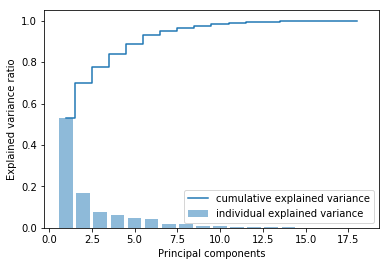

In [27]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [28]:
P_reduce = np.array(train_eigvectors_sorted[0:8])

In [29]:
X_train_8D=np.dot(X_train_z,P_reduce.T)

In [30]:
df_new=pd.DataFrame(X_train_8D)

In [32]:
df_new.shape


(676, 8)

In [34]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(df_new, y_train, test_size=0.30, random_state=7)

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


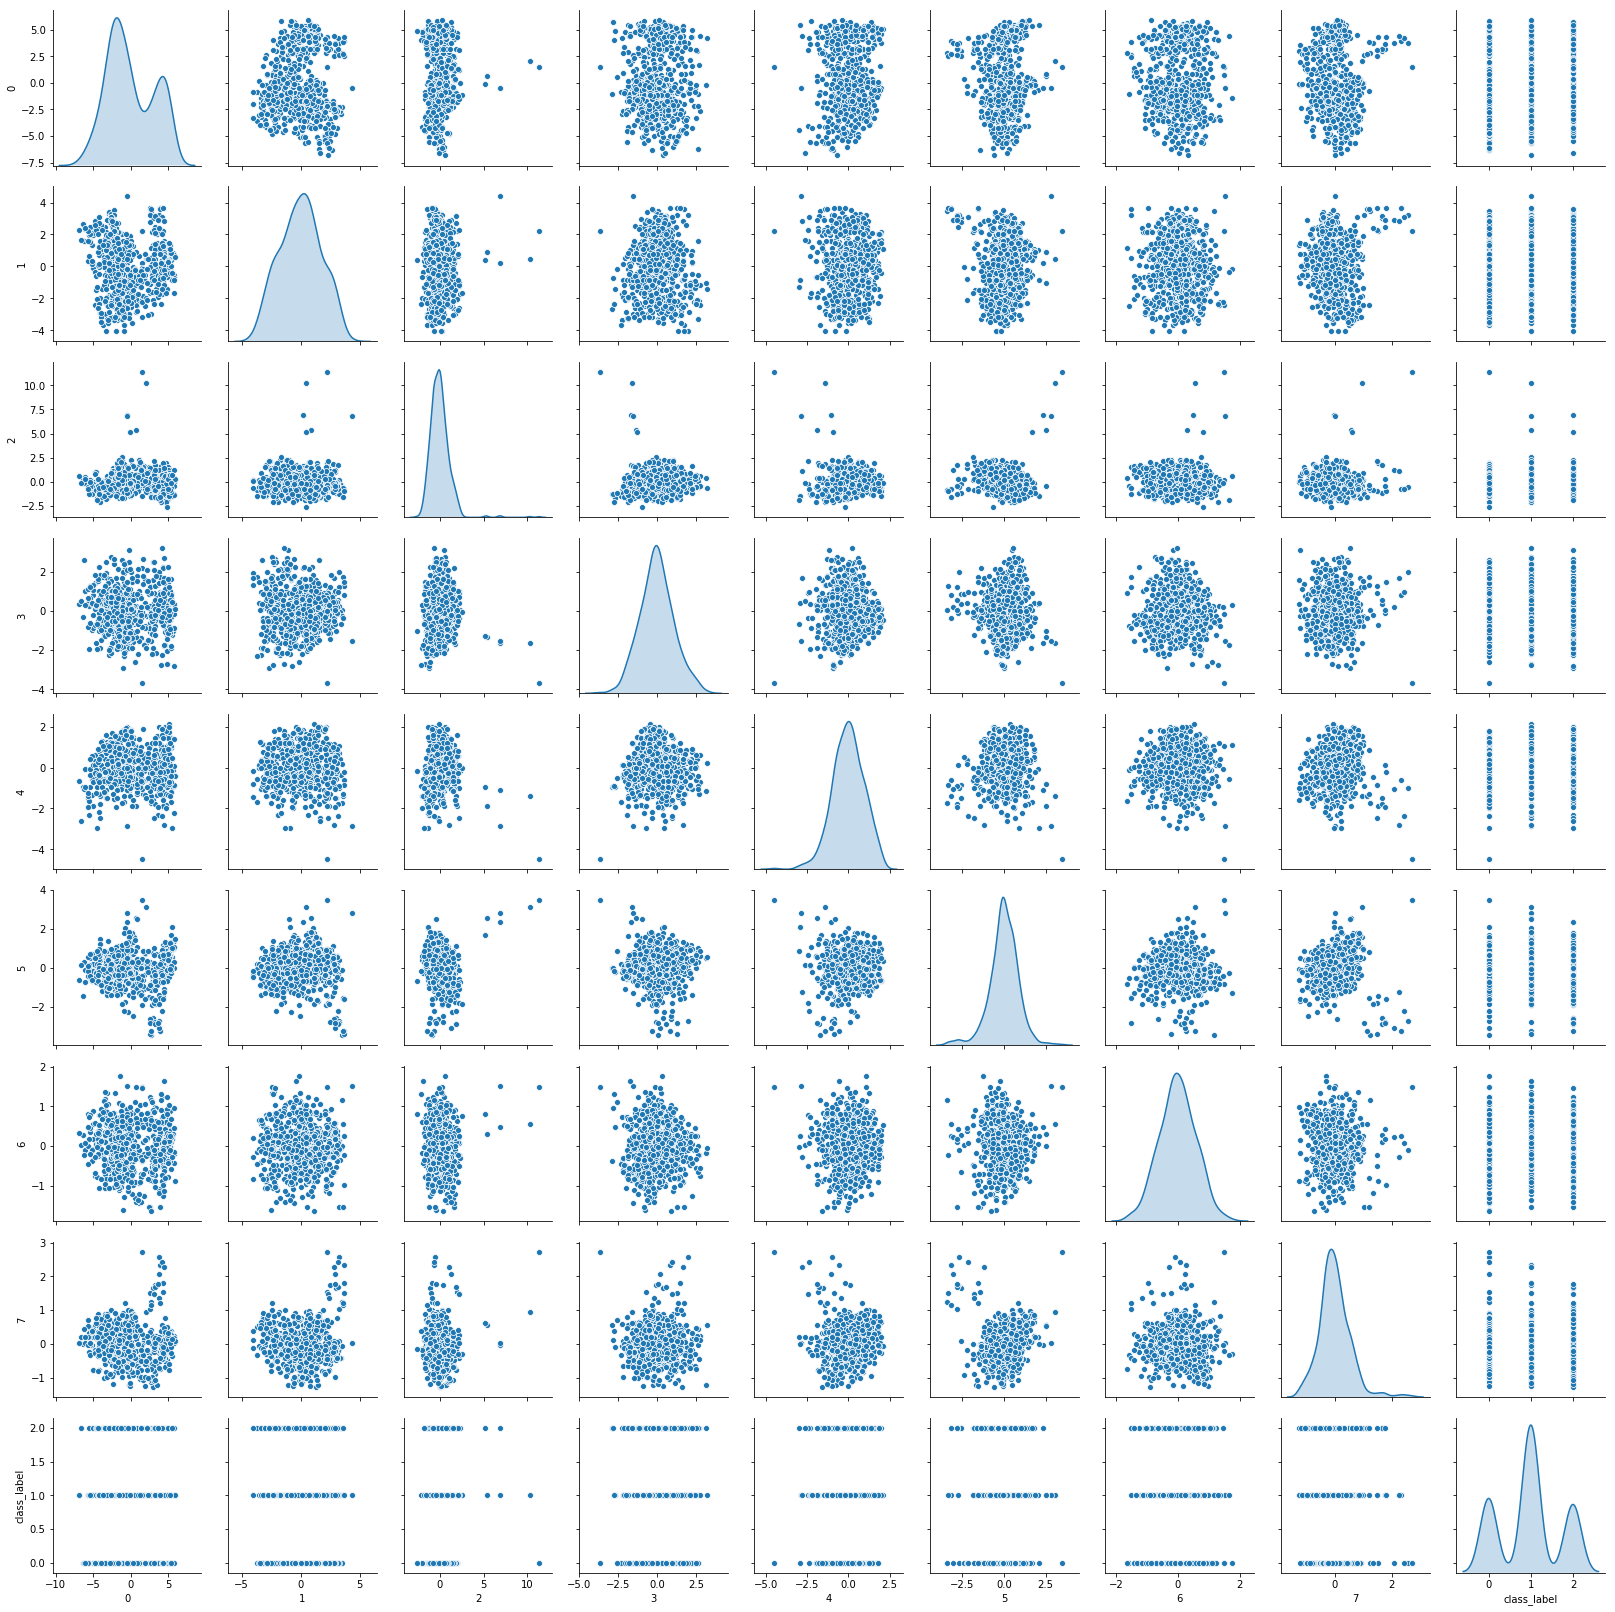

In [39]:
df_vehicle=df_new.join(df_target)
sns.pairplot(df_vehicle,diag_kind='kde')

In [47]:
model=SVC()

In [48]:
params = {'C': [0.01,0.05,0.5,1],
         'kernel': ['linear','rbf']}
#Make ML model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [49]:
model1.fit(X_train1,y_train1)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
y_pred=model1.predict(X_test1)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1,y_pred))  
print(classification_report(y_test1,y_pred))  

[[ 51   0   1]
 [  1 103   3]
 [  1   8  35]]
             precision    recall  f1-score   support

          0       0.96      0.98      0.97        52
          1       0.93      0.96      0.94       107
          2       0.90      0.80      0.84        44

avg / total       0.93      0.93      0.93       203



In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
results=cross_val_score(model1, X_train1,y_train1, scoring='mean_squared_error',cv=10)

C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\somduitybh046\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg

In [56]:
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

Mean Square Error: 0.095 (0.070)
